In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

## 1. Handling Missing values

In [6]:
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, 2, 3, np.nan, 5],
    'D': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

In [7]:
df.head()

,A,B,C,D
0,1.0,NaN,1.0,1
1,2.0,2.0,2.0,2
2,NaN,3.0,3.0,3
3,4.0,4.0,NaN,4
4,5.0,5.0,5.0,5


### a) .dropna()

In [8]:
#Remove rows with missing values
df.dropna()

,A,B,C,D
1,2.0,2.0,2.0,2
4,5.0,5.0,5.0,5


### b) .fillna()

In [9]:
# Replave null values with 0
df.fillna(0)

,A,B,C,D
0,1.0,0.0,1.0,1
1,2.0,2.0,2.0,2
2,0.0,3.0,3.0,3
3,4.0,4.0,0.0,4
4,5.0,5.0,5.0,5


### c) Replace missing values with mean, median and mode

In [11]:
# replace missing values with mean
df['A'].fillna(df['A'].mean())

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: A, dtype: float64

In [12]:
# replace missing values with median
df['B'].fillna(df['B'].median())

0    3.5
1    2.0
2    3.0
3    4.0
4    5.0
Name: B, dtype: float64

In [3]:
# replace missing values with mode

In [13]:
df['C'].fillna(df['C'].mode())

0    1.0
1    2.0
2    3.0
3    5.0
4    5.0
Name: C, dtype: float64

## 2. Removing Duplicates

In [14]:
students_data = {
    'Name': ["Alice", "Bob", "Charlie", "David", "Alice", "Eva", "Bob"],
    'Age': [20, 22, 21, 23, 20, 19, 22],
    'Grade': [85, 90, 78, 92, 85, 88, 90],
    'Attendance': [95, 92, 88, 93, 95, 96, 92]
}

students_df = pd.DataFrame(students_data)

In [16]:
students_df.head()

,Name,Age,Grade,Attendance
0,Alice,20,85,95
1,Bob,22,90,92
2,Charlie,21,78,88
3,David,23,92,93
4,Alice,20,85,95


In [18]:
# Remove all duplicate rows
students_df.drop_duplicates()

,Name,Age,Grade,Attendance
0,Alice,20,85,95
1,Bob,22,90,92
2,Charlie,21,78,88
3,David,23,92,93
5,Eva,19,88,96


In [19]:
# Delete duplicate rows based on specific columns (Name and Age)
students_df.drop_duplicates(subset = ['Name','Age'])

,Name,Age,Grade,Attendance
0,Alice,20,85,95
1,Bob,22,90,92
2,Charlie,21,78,88
3,David,23,92,93
5,Eva,19,88,96


## 3. Detecting and Removing Outliers

In [52]:
placement_df = pd.read_csv("C:/Users/HP/Downloads/placement/placement.csv")

In [53]:
placement_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


### a) Normal Distribution

The data points which fall below mean -3(sigma) or above mean +3(sigma) are outliers.

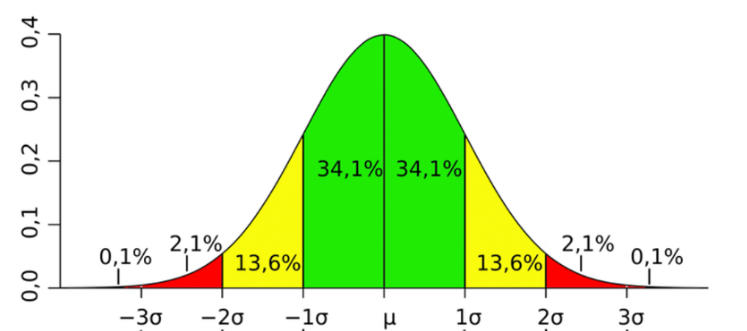

In [54]:
placement_df['placement_exam_marks'].skew()

0.8356419499466834

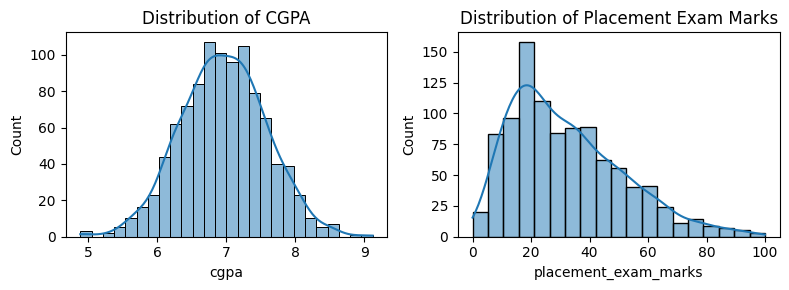

In [55]:
# Create the figure with the specified size
plt.figure(figsize=(8,3))

# Plot the first subplot for 'cgpa'
plt.subplot(1,2,1)
sns.histplot(data=placement_df, x='cgpa', kde=True)
plt.title('Distribution of CGPA')

# Plot the second subplot for 'placement_exam_marks'
plt.subplot(1,2,2)
sns.histplot(data=placement_df, x='placement_exam_marks', kde=True)
plt.title('Distribution of Placement Exam Marks')

# Show the plots
plt.tight_layout()
plt.show()

In [56]:
# Find boundary values for cgpa
print('Lowest allowed: ', placement_df['cgpa'].mean() - (3 * placement_df['cgpa'].std()))
print('Height allowed: ', placement_df['cgpa'].mean()+(3 * placement_df['cgpa'].std()))

Lowest allowed:  5.113546374602832
Height allowed:  8.808933625397168


In [59]:
# Find the outlier
placement_df[(placement_df['cgpa'] < 5.11) | (placement_df['cgpa'] > 8.80)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [60]:
# Trimming
new_df = placement_df[(placement_df['cgpa'] > 5.11) | (placement_df['cgpa'] < 8.80)]

In [61]:
new_df.shape

(1000, 3)

### b) Skewed Distribution

<Axes: ylabel='placement_exam_marks'>

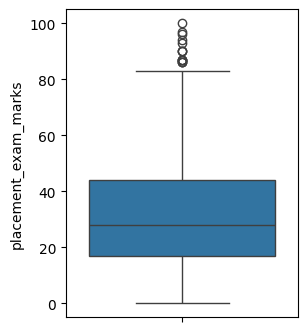

In [67]:
plt.figure(figsize = (3,4))
sns.boxplot(placement_df['placement_exam_marks'])

In [68]:
# Finding IQR
percentile25 = placement_df['placement_exam_marks'].quantile(0.25)
percentile75 = placement_df['placement_exam_marks'].quantile(0.75)

iqr = percentile75 - percentile25

In [71]:
# Calculate upper and lower bound
lowerBound = percentile25 - (1.5 * iqr)
upperBound = percentile75 + (1.5 * iqr)

print("Lower Bound: ", lowerBound)
print("Upper Bound: ", upperBound)

Lower Bound:  -23.5
Upper Bound:  84.5


In [72]:
# Finding Outliers
placement_df[(placement_df['placement_exam_marks'] < lowerBound) | (placement_df['placement_exam_marks'] > upperBound)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [73]:
# Trimming
new_placement_df = placement_df[placement_df['placement_exam_marks'] < upperBound]

In [74]:
new_placement_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# Decision Trees
A Decision Tree is used for both classification and regression tasks in machine learning. It works like a flowchart to make decisions based on the data.

### Structure of a Decision Tree
- **Root Node:** The top node representing the entire dataset. It splits into two or more sets.
- **Internal Nodes:** Nodes that represent features and make decisions to split the data further.
- **Leaf Nodes:** The final nodes that represent the outcome or prediction.

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
iris = load_iris()

Column 0 = sepal length, Column 1 = sepal width, Column 2 = petal length, Column 3 = petal width

In [4]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [5]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [6]:
export_graphviz(tree_clf, 
                out_file = "iris_tree.dot", 
                feature_names = iris.feature_names[2:], 
                class_names = iris.target_names, 
                rounded = True, filled = True)

with open("iris_tree.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)
graph.render("iris_tree", format = "png")
graph.view()

'iris_tree.pdf'

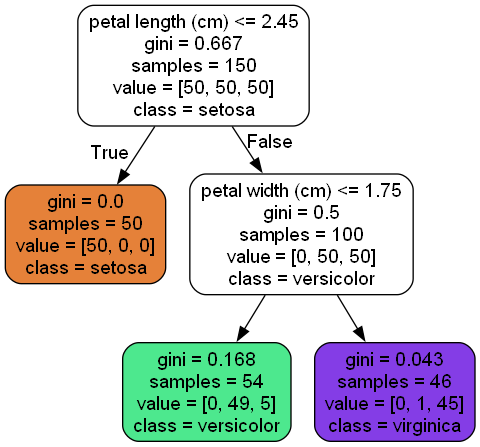